# Mathematik für Biologiestudierende

Wintersemester 2025/26

Dreikönigstag 2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen heute

* Data Snooping
* Multiple Vergleiche
* Bonferroni-Korrektur
* Gruppenvergleiche
* ANOVA

In [2]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Data Snooping 

 * "Snooping" = "Schnüffeln"
 * Data Snooping bedeutet, dass man den Test für dieselben Daten rechnet, die man auch für die Formulierung der Hypothese benutzt hat

* Jemand stellt fest, dass in einer Stadt von 50 Neugeborenen 35 weiblich sind.
* Wir machen den entsprechenden Binomialtest

In [4]:
stats.binomtest(35, 50)

BinomTestResult(k=35, n=50, alternative='two-sided', statistic=0.7, pvalue=0.006600447966810918)

* Die Nullhypothese, dass die Wahrscheinlichkeiten von Jungs- und Mädchengeburten gleich sind, kann abgelehnt werden.  Der $p$-Wert beträgt $0.0066$

* Was bedeutet das?

## Szenario 1

* *Theorie:* Bekanntlich werden die Babies von den Weißstörchen gebracht.  Eine neue Theorie besagt, dass Schwarzstörche das zwar auch tun, aber nicht im korrekten Geschlechterverhältnis.
* *Vorgehen:* Die Forscher wählen daher einen Ort mit einer großen Population an Schwarzstörchen aus und untersuchen dort das Verhältnis von Mädchen- zu Jungsgeburten.
* *Bewertung:* Wenn dort das Zahlenverhältnis 35:15 beträgt, ist die Theorie zum Signifikanzniveau $p = 0.0066$ bestätigt.

## Szenario 2

* *Theorie:* Keine.  Man will bloss mal gucken.
* *Vorgehen:* In 100 Gemeinden mit mehr als 50 Geburten wird das Verhältnis zwischen Mädchen- und Jungsgeburten untersucht. Tatsächlich findet sich eine Gemeinde mit dem Zahlenverhältnis 35:15
* *Bewertung:* Das ist **Data Snooping**, weil die Hypothese aus denselben Daten generiert worden ist, mit denen anschließend der Test gerechnet wird.

## Gefahren des Data Snooping

* Wir haben ein Experiment, welches nur mit einer Wahrscheinlichkeit $ p = 0.0066 $ gelingt.
* Wir wiederholen dieses Experiment 100 mal.

Mit welcher Wahrscheinlichkeit gelingt das Experiment in mindestens einem dieser Fälle?

Das ist eine Wiederholung eines ja/nein-Experiments mit folgenden Daten

* Erfolgswahrscheinlichkeit im Einzelfall $p=0.0066$
* Stichpropenumfang $n=100$

Zugehörige Binomialverteilung

In [6]:
P = stats.binom(100, 0.0066)

Wahrscheinlichkeit, dass es keinen einzigen Erfolg gibt

In [7]:
p0 = P.pmf(0)
p0

0.5157218904013275

Wahrscheinlichkeit, dass es mindestens einen Erfolg gibt

In [8]:
1 - p0

0.48427810959867246

#### Fazit

* Ein einzelnes Ereignis, welches mit Wahrscheinlichkeit 0.0066 auftritt, ist überraschend
* Wenn eines von hundert Ereignissen, die jedes einzeln mit Wahrscheinlichkeit 0.0066 auftreten, tatsächlich eintritt, dann ist das nicht überraschend

# Multiple Vergleiche

Möglichkeiten für korrektes Vorgehen 

* Versuchsplanung 
  * Pilotversuch

* statistische Verfahren 
  * Bonferroni-Korrektur
  * Bonferroni-Holm-Korrektur
  * False Discovery Rate

# Bonferroni-Korrektur

* Wenn man simultan $n$ Vergleiche durchführt, dann schreibt die Bonferroni-Korrektur vor, dass man jeden einzelnen Vergleich zum Signifikanzniveau $\frac\alpha n$ durchführt, um insgesamt das Signifikanzniveau $\alpha$ zu erreichen

* Im Beispiel der Schwarzstörche hätte für jeden Einzeltest das Signifikanzniveau $\frac{0.05}{100} =  0.0005$ gewählt werden müssen

# Bonferroni-Holm-Korrektur 

erkläre ich, nachdem ich die Bonferroni-Korrektur für die ANOVA vorgemacht habe

# False Discovery Rate

* Beispiel Bilddaten: 20 Magnetresonanztomographie-Aufnahmen (MRT) von gesunden Gehirnen und 20 MRT-Aufnahmen von erkrankten Gehirnen, wobei die Gehirne auf einen Standardatlas normalisiert werden
* In dem Standardatlas werden alle Voxel (3D-Pixel) markiert, bei denen der Eisengehalt der Gruppe der Erkrankten signifikant über dem der Gruppe der Gesunden liegt

 Wenn der Bildausschnit $100 mm \times 100mm \times 100mm$ beträgt und die Auflösung des MRT bei 1.5mm liegt, dann haben wir

In [10]:
100/1.5

66.66666666666667

Voxel für eine Seitenlänge, also insgesamt

In [11]:
66 * 66 * 66

287496

d.h. knapp 290000 Voxel.  Damit ist eine Bonferroni-Korrektur undenkbar.

* Alternative: False Discovery Rate
* FDR von 1% sagt: im Schnitt sind nur 1% aller markierten Voxel falsch
* Zum Vergleich: Ein multipler Test zum Signifikanzniveau 5% sagt: Die Wahrscheinlichkeit, dass auch nur ein einziges Voxel zu Unrecht markiert ist, beträgt höchstens 5%

# Gruppenvergleiche

* An fünf verschiedenen Messstellen wurde die Konzentration eines Schadstoffs gemessen
* Hat die Messstelle einen Einfluss auf die Konzentration?

* Wir könnten die Konzentrationen an je zwei Messstellen vergleichen
* Das sind $\binom52 = 10$ Vergleiche
* Wir müssen dann entsprechend Bonferroni korrigieren

* nicht optimal
* Solche Gruppenvergleiche sind das Einsatzgebiet der ANOVA und ihrer Varianten
* ANOVA = Analysis of Variance

# ANOVA

* ANOVA: Analysis of Variance
* Ziel: Vergleich bei Vorliegen von mehr als zwei Gruppen

Welche Daten hat man?

* Eine Population
* Eine Zielvariable.  Das ist die kontinuierliche Größe, die gemessen wird.
* Einen Faktor.  Das ist eine kategorielle (also qualitative oder diskrete quantitative) Größen, von der man nachweisen will, dass sie die Zielvariable beeinflusst
* Alle Mitglieder der Population, bei denen der Faktor denselben Wert hat, bilden eine *Gruppe*

* die Zielvariable muss normalverteilt sein
* innerhalb aller Gruppen ist die Varianz der Zielvariablen dieselbe

* Wenn man nur zwei Gruppen hat, dann macht man einen unverbundenen, zweiseitigen t-Test

#### Beispiel Schadstoffkonzentration

* An fünf verschiedenen Messstellen wurde die Konzentration eines Schadstoffs gemessen
* Hat die Messstelle einen Einfluss auf die Konzentration?

* Die Messstelle ist der Faktor
* Die Konzentration ist die Zielvariable
* es gibt fünf Gruppen, eine für jede Messstelle

In [3]:
u_schad = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
schadstoff = pd.read_csv(u_schad, index_col=0)
schadstoff.head()

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152


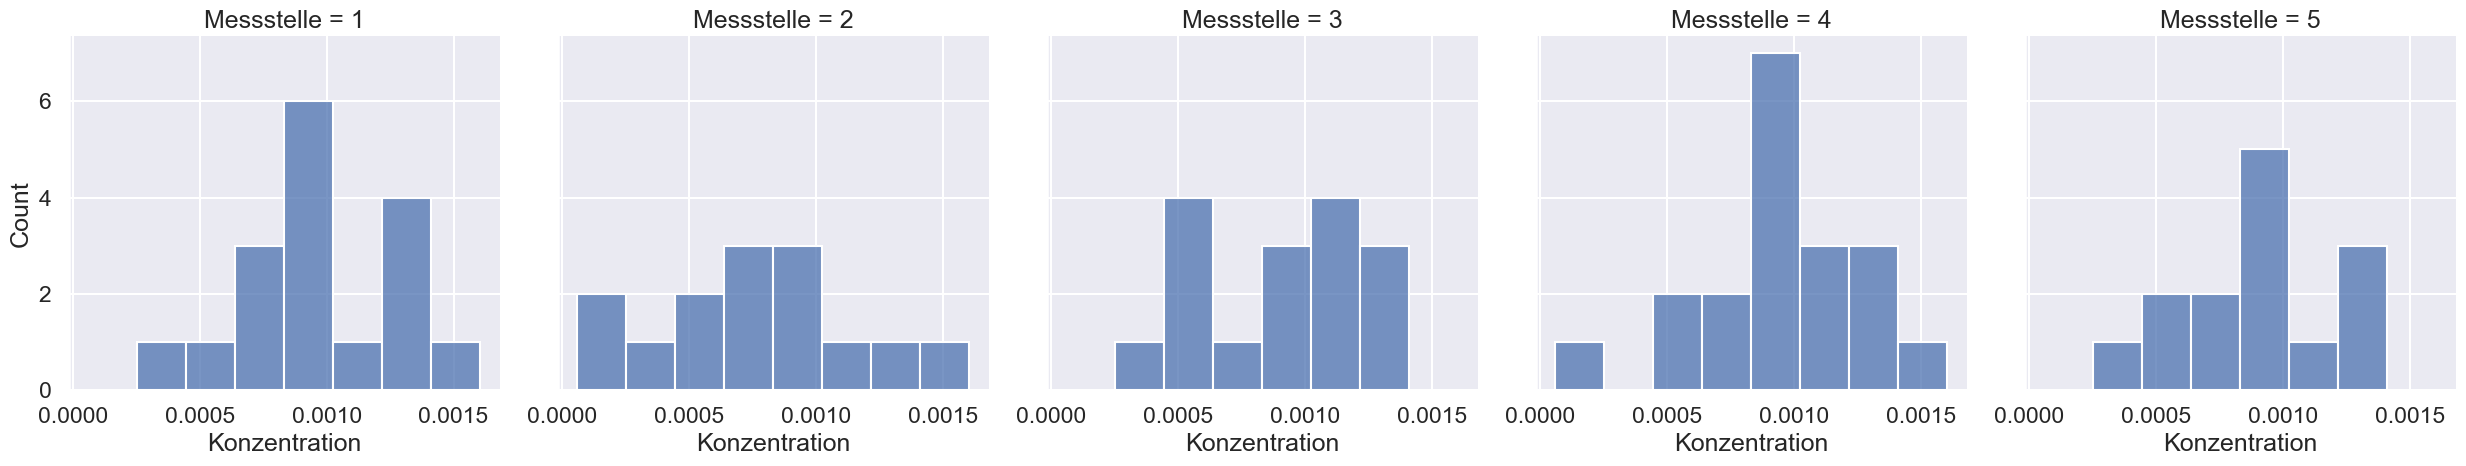

In [5]:
sns.displot(data=schadstoff, x='Konzentration', col='Messstelle');

Wir müssen die Gruppen mit `pandas` trennen

In [6]:
g1 = schadstoff[schadstoff.Messstelle==1].Konzentration
g1

2     0.000589
3     0.000950
13    0.001301
14    0.001605
18    0.000927
22    0.001250
28    0.000965
33    0.000669
41    0.000712
42    0.001019
45    0.000780
54    0.001306
61    0.001006
64    0.001057
65    0.000381
70    0.000919
74    0.001323
Name: Konzentration, dtype: float64

In [20]:
g2 = schadstoff[schadstoff.Messstelle==2].Konzentration
g3 = schadstoff[schadstoff.Messstelle==3].Konzentration
g4 = schadstoff[schadstoff.Messstelle==4].Konzentration
g5 = schadstoff[schadstoff.Messstelle==5].Konzentration

wenn Sie das machen, schauen Sie sich die einzelnen Tabellen an, ob sie so aussehen wie gewünscht

In [21]:
g4.head()

4     0.001152
5     0.001318
6     0.000849
8     0.000982
23    0.000505
Name: Konzentration, dtype: float64

In [13]:
res = stats.f_oneway(g1, g2, g3, g4, g5)
res

F_onewayResult(statistic=0.8666121588849811, pvalue=0.48807057520065544)

* es wurde eine *one way ANOVA* gerechnet, also eine mit nur einem Faktor

* Der p-Wert ist 0.5
* Die Messstelle hat keinen Einfluss auf die Konzentration

Welche Verteilung benutzt dieser Test?

* Die F-Verteilung dient zum Vergleich zweier Varianzen
* Sie hat zwei Parameter:
  * bei der einfaktoriellen ANOVA ist der erste Parameter gleich $g-1$, wenn $g$ die Anzahl der Gruppen ist
  * und der zweite ist $n-g$, wenn $n$ der Stichprobenumfang ist
* In `scipy.stats` wird sie zur Verfügung gestellt durch `P = stats.f(g-1, n-g)`

* Wenn `t` die Teststatistik der ANOVA ist, dann ist `1 - P.cdf(t)` der *p*-Wert

* Im Beispiel: $g=5$, $n=80$

In [16]:
P = stats.f(4, 75)
1 - P.cdf(res.statistic)

0.48807057520065544

Zum Vergleich

In [17]:
res.pvalue

0.48807057520065544